# Regression analysis

## Principle of regression

Supervised methods in ML includ classification (cf. titanic) and regression (cf. this exercise about house prices in Boston).

Regression = set of statistical methods helping us to find relationships between variables (predictors = covariates = features = independent variables; outcomes = response variables = dependent variables).

Example: House prices proportional to the size of houses.

## Definition of the problem

The main goal of this exercise is to predict the sale prices for each house (in Boston) based on the different features provided in the dataset.

The data presented in this notebook come from the Kaggle website and report the features that we may want to consider for the exercise.

## Problematic

How to predict the sale prices for each house? Which would be the predicted prices for these houses?

## Resolution approaches

Regression -> Test different regression methods (linear, lasso, ridge, polynomial).

Metrics: RMSE

=> Logs : the distribution of the sale prices of the houses is exponential.

Exp(log) = linear

Log(Exp) = linear

=> Balancing the evaluation (otherwise, all sale prices of expensive houses would take the place of cheaper houses).

## Parameters

## Import modules and load files

In [20]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.model_selection import train_test_split

# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import r2_score

In [2]:
train = pd.read_csv("../data/raw/house_prices/train.csv", sep = ",", index_col=0) # ID n'a pas de valeur pour faire les prédictions
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("../data/raw/house_prices/test.csv", sep = ",")
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
sample = pd.read_csv("../data/raw/house_prices/sample_submission.csv", sep = ",")
sample.info()
sample.head()

In [ ]:
train["MSSubClass"].unique()

In [ ]:
train["MSZoning"].unique()

In [ ]:
train["LandContour"].unique()

In [ ]:
for header in train.columns.values:
    print(header)
    print("Unique values:", train[header].unique())
    print("=============================")

| Variables | Natures of the variables | 
| :--------: | :--------------------: |
| Id         | Numerical (quantitative) discrete |
| MSSubClass | Numerical (quantitative) continuous |
| MSZoning   | Categorical (qualitative)|
| LotFrontage | Numerical (quantitative) continuous |
| LotArea    | Numerical (quantitative) continuous |
| Street     | Categorical (qualitative) |
| Alley      | Categorical (qualitative) |
| LotShape   | Categorical (qualitative) |
| LandContour | Categorical (qualitative) |
| Utilities | Categorical qualitative |
| LotConfig | Categorical qualitative |
| LandSlope | Categorical qualitative |
| Neighborhood | Categorical qualitative |
| Condition1 | Categorical qualitative |
| Condition2 | Categorical qualitative |
| BldgType | Categorical qualitative |
| HouseStyle | Categorical qualitative |
| OverallQual | Numerical (quantitative) discrete |
| OverallCond | Numerical (quantitative) discrete |
| YearBuilt | Categorical (qualitative) if discretisation after (old/new houses) / Numerical qualitative discrete (limit #columns for the model) |
| YearRemodAdd | same |
| RoofStyle | Categorical qualitative |
| RoofMatl | Categorical qualitative |
| Exterior1 | Categorical qualitative |
| Exterior2nd | Categorical qualitative |
| MasVnrType | Categorical qualitative |
| MasVnrArea | Numerical quantitative continuous |
| ExterQual | Categorical qualitative |
| ExterCond | Categorical qualitative |
| Foundation | Categorical qualitative |
| BsmtQual | Categorical qualitative |
| BsmtCond | Categorical qualitative |
| BsmtExposure | Categorical qualitative |
| BsmtFinType1 | Categorical qualitative |
| BsmtFinSF1 | Numerical (qualitative) continuous |
| BsmtFinType2 | Categorical qualitative |
| BsmtFinSF2 | Numerical (qualitative) continuous |
| BsmtUnfSF | Numerical (qualitative) continuous |
| TotalBsmtSF | Numerical (qualitative) continuous |
| Heating | Categorical qualitative |
| HeatingQC | Categorical qualitative |
| CentralAir | Categorical qualitative |
| Electrical | Categorical qualitative |
| 1stFlrSF | Numerical (quantitative) continuous |
| 2ndFlrSF | Numerical (quantitative) continuous |
| LowQualFinSF | Numerical (quantitative) continuous |
| GrLivArea | Numerical (quantitative) continuous |
| BsmtFullBath | Numerical (quantitative) discrete | 
| BsmtHalfBath | Numerical (quantitative) discrete |
| FullBath | Numerical (quantitative) discrete |
| HalfBath | Numerical (quantitative) discrete |
| BedroomAbvGr | Numerical (quantitative) discrete |
| KitchenAbvGr | Numerical (quantitative) discrete |
| KitchenQual | Categorical (qualitative) |
| TotRmsAbvGrd | Numerical (quantitative) discrete |
| Functional | Categorical (qualitative) |
| Fireplaces | Numerical (quantitative) discrete |
| FireplaceQu | Categorical (qualitative) |
| GarageType | Categorical (qualitative) |
| GarageYrBlt | Categorical (qualitative) if discretisation after (old/new houses) / Numerical qualitative continuous (limit #columns for the model) |
| GarageFinish | Categorical (qualitative) |
| GarageCars | Numerical (quantitative) discrete |
| GarageArea | Numerical (quantitative) continuous) |
| GarageQual | Categorical (qualitative) |
| GarageCond | Categorical (qualitative) |
| PavedDrive | Categorical (qualitative) |
| WoodDeckSF | Numerical (quantitative) continuous |
| OpenPorchSF | Numerical (quantitative) discrete |
| EnclosedPorch | Numerical (quantitative) discrete |
| 3SsnPorch | Numerical (quantitative) continuous |
| ScreenPorch | Numerical (quantitative) continuous |
| PoolArea | Numerical (quantitative) continuous |
| PoolQC | Categorical (qualitative) |
| Fence | Categorical (qualitative) |
| MiscFeature | Categorical (qualitative) |
| MiscVal | Numerical (quantitative) continuous |
| MoSold | Numerical (quantitative) continuous |
| YrSold | Categorical (qualitative) if discretisation after (old/new houses) / Numerical qualitative continuous (limit #columns for the model) |
| SaleType | Categorical (qualitative) |
| SaleCondition | Categorical (qualitative) |
| SalePrice | Numerical (quantitative) continuous |

float: numerical quantitative continuous (warning: time); string: qualitative, categorical; int: difficult to determine (either one, either the other, or none of them) -> ID: none of them (for us, not the machine learning model) -> meta data (= data which give us information about the sample, data about data)

Categorical variables: no order, fixed number of possible values (ex: a cat / a dog)

If we exclude the years, we have 43 categorical variables

In [ ]:
fig = px.box(train, x = "MSSubClass", y = "SalePrice", log_y = True, 
             title = "Boxplot representing the house prices according to the SubClasses")
fig.show()

In [ ]:
fig = px.box(train, x = "MSZoning", y = "SalePrice", title = "Impact of the MSZoning on the house prices", log_y=True)
fig.show()

In [ ]:
# LotFrontage and LotArea: continuous variables => Line plots or scatter plots
fig = px.scatter(train, x = "LotArea", y = "SalePrice", color = "Neighborhood",
                title = "Impact of the lot area on house prices")
fig.show()

In [ ]:
fig = px.box(train, x = "Neighborhood", y = "SalePrice", 
                title = "Impact of the different parameters on house prices")
fig.show()

## Data preparation

If categorical data => OneHotEncoder

If numerical data => filling null data in (by fixed number, or the mean) => If mean: calculation from the TRAINING dataset

In [4]:
# Separating the features and the target (SalePrice)
X = train.drop(columns = ["SalePrice"])
#[[
#     "MSSubClass",
#     "MSZoning",
#     "HouseStyle",
#     "YearBuilt",
#     "Heating",
#     "Electrical",
#     "BsmtFullBath",
#     "FullBath",
#     "BedroomAbvGr",
#     "KitchenAbvGr",
#     "KitchenQual",
#     "GarageType",
#     "GarageCars",
#     "PavedDrive",
#     "OpenPorchSF",
#     "PoolQC"
# ]]
#X.info()
#X.head()

y = train["SalePrice"]
y.info()
y.head()

<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB


Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [5]:
# Splitting the train dataset, to evaluate the model's performance
# Good practice: splitting the earlier as possible, to avoid that data from dataset could be found in the test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

# Random_state: generating random nb => algo generating pseudo-random nb (in info, all is deterministic). To add an external random notion, this algo 
# takes a seed to initialize the algo. 
# => For a given seed, we will always have the same generated random nb sequence.
# Here, in this function, the random-state parameter is the seed (parameter of random nb)
# => Here, we determine in advance which will be the repartition between the train and the test, ie the result that we have today is exactly the same
# result as the one we obtained a few months ago.
# => Reproducibility

In [ ]:
X_train.info()
X_train.head()
#X_test
#y_train
#y_test

In [6]:
# Filling missing values in X_train
X_train["LotFrontage"] = X_train["LotFrontage"].fillna(value = X_train["LotFrontage"].mean())
X_train["Alley"] = X_train["Alley"].fillna(value = "unknown")
X_train["MasVnrType"] = X_train["MasVnrType"].fillna(value = "unknown")
X_train["MasVnrArea"] = X_train["MasVnrArea"].fillna(value = X_train["MasVnrArea"].mean())
X_train["BsmtQual"] = X_train["BsmtQual"].fillna(value = "unknown")
X_train["BsmtCond"] = X_train["BsmtCond"].fillna(value = "unknown")
X_train["BsmtExposure"] = X_train["BsmtExposure"].fillna(value = "unknown")
X_train["BsmtFinType1"] = X_train["BsmtFinType1"].fillna(value = "unknown")
X_train["BsmtFinType2"] = X_train["BsmtFinType2"].fillna(value = "unknown")
X_train["Electrical"] = X_train["Electrical"].fillna(value = "unknown")
X_train["FireplaceQu"] = X_train["FireplaceQu"].fillna(value = "unknown")
X_train["GarageType"] = X_train["GarageType"].fillna(value = "unknown")
X_train["GarageYrBlt"] = X_train["GarageYrBlt"].fillna(value = X_train["GarageYrBlt"].mean())
X_train["GarageFinish"] = X_train["GarageFinish"].fillna(value = "unknown")
X_train["GarageQual"] = X_train["GarageQual"].fillna(value = "unknown")
X_train["GarageCond"] = X_train["GarageCond"].fillna(value = "unknown")
X_train["PoolQC"] = X_train["PoolQC"].fillna(value = "unknown")
X_train["Fence"] = X_train["Fence"].fillna(value = "unknown")
X_train["MiscFeature"] = X_train["MiscFeature"].fillna(value = "unknown")
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 616 to 1127
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     978 non-null    int64  
 1   MSZoning       978 non-null    object 
 2   LotFrontage    978 non-null    float64
 3   LotArea        978 non-null    int64  
 4   Street         978 non-null    object 
 5   Alley          978 non-null    object 
 6   LotShape       978 non-null    object 
 7   LandContour    978 non-null    object 
 8   Utilities      978 non-null    object 
 9   LotConfig      978 non-null    object 
 10  LandSlope      978 non-null    object 
 11  Neighborhood   978 non-null    object 
 12  Condition1     978 non-null    object 
 13  Condition2     978 non-null    object 
 14  BldgType       978 non-null    object 
 15  HouseStyle     978 non-null    object 
 16  OverallQual    978 non-null    int64  
 17  OverallCond    978 non-null    int64  
 18  YearBuilt   

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
616,85,RL,80.0,8800,Pave,unknown,Reg,Lvl,AllPub,Inside,...,0,0,unknown,MnPrv,unknown,0,5,2010,WD,Abnorml
614,20,RL,70.0,8402,Pave,unknown,Reg,Lvl,AllPub,Inside,...,0,0,unknown,unknown,unknown,0,12,2007,New,Partial
1304,20,RL,73.0,8688,Pave,unknown,Reg,Lvl,AllPub,Inside,...,0,0,unknown,unknown,unknown,0,4,2006,WD,Normal
487,20,RL,79.0,10289,Pave,unknown,Reg,Lvl,AllPub,Inside,...,0,0,unknown,unknown,unknown,0,6,2007,WD,Normal
562,20,RL,77.0,10010,Pave,unknown,Reg,Lvl,AllPub,Inside,...,0,0,unknown,unknown,unknown,0,4,2006,WD,Normal


In [7]:
# OneHotEncoder on X_train

# Limit to categorical data using df.select_dtypes() => onehotencoder creates one column by possible value
X_enc = X_train.select_dtypes(include=[object]) # X_enc = subset of categorical variables; object: probably str (to which a numerical value is assigned)
#X_enc.info() # => 43 categorical variables = > ok
#X_enc.head()

# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown = "infrequent_if_exist", min_frequency = 10) # handle_unknown: column in which a category is never represented 
# (ex if a category is only represented in the test dataset), 
# put "error" as far as we can
#enc

# Apply one-hot encoding to the categorical columns
enc = enc.fit(X_enc) # looks at each column and determine unique values for each column: calculates all possible values for each categorical values
#enc.categories_ # double table: 1st element = list of possible values in the 1st column 
# (respects the order of the columns, order of the columns in X_enc)

# Transform on X_enc
X_enc_transfo = enc.transform(X_enc).toarray()
enc.get_feature_names_out()

# Building the dataframe
df_enc = pd.DataFrame(X_enc_transfo, columns = enc.get_feature_names_out(), index = X_enc.index, dtype=int)
#df_enc.info()
#df_enc.head(5)

# Deleting the columns containing categorical values in X_train and merging the 2 dataframes (X_train + df_enc) on IDs
X_train_drop = X_train.drop(columns = X_enc.columns)
#X_train.info()
#X_train.head()
X_train = X_train_drop.merge(df_enc, how = "left", left_index = True, right_index = True)
X_train.info()
X_train.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 616 to 1127
Columns: 251 entries, MSSubClass to SaleCondition_infrequent_sklearn
dtypes: float64(3), int64(248)
memory usage: 1.9 MB


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscFeature_infrequent_sklearn,SaleType_COD,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
Id,,,,,,,,,,,,,,,,,,,,,
616,85,80.0,8800,6,7,1963,1963,156.0,763,0,...,0,0,0,1,0,1,0,0,0,0
614,20,70.0,8402,5,5,2007,2007,0.0,206,0,...,0,0,1,0,0,0,0,0,1,0
1304,20,73.0,8688,7,5,2005,2005,228.0,0,0,...,0,0,0,1,0,0,0,1,0,0
487,20,79.0,10289,5,7,1965,1965,168.0,836,0,...,0,0,0,1,0,0,0,1,0,0
562,20,77.0,10010,5,5,1974,1975,0.0,1071,123,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
X_enc_transfo.shape

In [ ]:
enc.get_feature_names_out().shape

In [ ]:
X_enc.shape

In [8]:
# Doing the same data preprocessing for the test dataset X_test: do the fillna() and onehotencoder
# fitting the model on the data => adjusting the model on our data  

# Filling missing values in => WARNING: SAME mean as X_train
X_test["LotFrontage"] = X_test["LotFrontage"].fillna(value = X_train["LotFrontage"].mean())
X_test["Alley"] = X_test["Alley"].fillna(value = "unknown")
X_test["MasVnrType"] = X_test["MasVnrType"].fillna(value = "unknown")
X_test["MasVnrArea"] = X_test["MasVnrArea"].fillna(value = X_train["MasVnrArea"].mean())
X_test["BsmtQual"] = X_test["BsmtQual"].fillna(value = "unknown")
X_test["BsmtCond"] = X_test["BsmtCond"].fillna(value = "unknown")
X_test["BsmtExposure"] = X_test["BsmtExposure"].fillna(value = "unknown")
X_test["BsmtFinType1"] = X_test["BsmtFinType1"].fillna(value = "unknown")
X_test["BsmtFinType2"] = X_test["BsmtFinType2"].fillna(value = "unknown")
X_test["Electrical"] = X_test["Electrical"].fillna(value = "unknown")
X_test["FireplaceQu"] = X_test["FireplaceQu"].fillna(value = "unknown")
X_test["GarageType"] = X_test["GarageType"].fillna(value = "unknown")
X_test["GarageYrBlt"] = X_test["GarageYrBlt"].fillna(value = X_train["GarageYrBlt"].mean())
X_test["GarageFinish"] = X_test["GarageFinish"].fillna(value = "unknown")
X_test["GarageQual"] = X_test["GarageQual"].fillna(value = "unknown")
X_test["GarageCond"] = X_test["GarageCond"].fillna(value = "unknown")
X_test["PoolQC"] = X_test["PoolQC"].fillna(value = "unknown")
X_test["Fence"] = X_test["Fence"].fillna(value = "unknown")
X_test["MiscFeature"] = X_test["MiscFeature"].fillna(value = "unknown")
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 893 to 1285
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     482 non-null    int64  
 1   MSZoning       482 non-null    object 
 2   LotFrontage    482 non-null    float64
 3   LotArea        482 non-null    int64  
 4   Street         482 non-null    object 
 5   Alley          482 non-null    object 
 6   LotShape       482 non-null    object 
 7   LandContour    482 non-null    object 
 8   Utilities      482 non-null    object 
 9   LotConfig      482 non-null    object 
 10  LandSlope      482 non-null    object 
 11  Neighborhood   482 non-null    object 
 12  Condition1     482 non-null    object 
 13  Condition2     482 non-null    object 
 14  BldgType       482 non-null    object 
 15  HouseStyle     482 non-null    object 
 16  OverallQual    482 non-null    int64  
 17  OverallCond    482 non-null    int64  
 18  YearBuilt   

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
893,20,RL,70.0,8414,Pave,unknown,Reg,Lvl,AllPub,Inside,...,0,0,unknown,MnPrv,unknown,0,2,2006,WD,Normal
1106,60,RL,98.0,12256,Pave,unknown,IR1,Lvl,AllPub,Corner,...,0,0,unknown,unknown,unknown,0,4,2010,WD,Normal
414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,unknown,unknown,unknown,0,3,2010,WD,Normal
523,50,RM,50.0,5000,Pave,unknown,Reg,Lvl,AllPub,Corner,...,0,0,unknown,unknown,unknown,0,10,2006,WD,Normal
1037,20,RL,89.0,12898,Pave,unknown,IR1,HLS,AllPub,Inside,...,0,0,unknown,unknown,unknown,0,9,2009,WD,Normal


In [9]:
# OneHotEncoder on X_test

# Limit to categorical data using df.select_dtypes() => onehotencoder creates one column by possible value
X_enc = X_test.select_dtypes(include=[object]) # X_enc = subset of categorical variables; object: probably str (to which a numerical value is assigned)
#X_enc.info() # => 43 categorical variables = > ok (initial categorical columns)
#X_enc.head()

# Creating instance of one-hot-encoder: this object contains all values of each categorie to be able to convert the categories in the appropriated 
# column (1 value = 1 column) -> calculated from what we already know 
#enc = OneHotEncoder() # handle_unknown: column in which a category is never represented (ex if a category is only represented in the test dataset), 
# put "error" as far as we can
#enc

# Apply one-hot encoding to the categorical columns: WARNING: All fits are done on X_train
#enc = enc.fit(X_enc) # looks at each column and determine unique values for each column: calculates all possible values for each categorical values
#enc.categories_ # double table: 1st element = list of possible values in the 1st column 
# (respects the order of the columns, order of the columns in X_enc)

# Transform on X_enc: Transform each categorical value in boolean column (0 or 1)
X_enc_transfo = enc.transform(X_enc).toarray()
enc.get_feature_names_out()

# Building the dataframe
df_enc = pd.DataFrame(X_enc_transfo, columns = enc.get_feature_names_out(), index = X_enc.index, dtype=int)
#df_enc.info()
#df_enc.head(5)

# Deleting the columns containing categorical values in X_train and merging the 2 dataframes (X_train + df_enc) on IDs
# (replacing categorical values by encoded ones)
X_test_drop = X_test.drop(columns = X_enc.columns)
#X_test.info()
#X_test.head()
X_test = X_test_drop.merge(df_enc, how = "left", left_index = True, right_index = True)
X_test.info()
X_test.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 893 to 1285
Columns: 251 entries, MSSubClass to SaleCondition_infrequent_sklearn
dtypes: float64(3), int64(248)
memory usage: 965.1 KB


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscFeature_infrequent_sklearn,SaleType_COD,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
Id,,,,,,,,,,,,,,,,,,,,,
893,20,70.0,8414,6,8,1963,2003,0.0,663,0,...,0,0,0,1,0,0,0,1,0,0
1106,60,98.0,12256,8,5,1994,1995,362.0,1032,0,...,0,0,0,1,0,0,0,1,0,0
414,30,56.0,8960,5,6,1927,1950,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
523,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,0,0,1,0,0,0,1,0,0
1037,20,89.0,12898,9,5,2007,2008,70.0,1022,0,...,0,0,0,1,0,0,0,1,0,0


In [10]:
df_enc.head(5)
#X_enc.info()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_infrequent_sklearn,Street_Pave,Street_infrequent_sklearn,Alley_Grvl,Alley_Pave,Alley_unknown,...,MiscFeature_infrequent_sklearn,SaleType_COD,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
Id,,,,,,,,,,,,,,,,,,,,,
893,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1106,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
414,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
523,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1037,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [11]:
X_enc.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
893,RL,Pave,unknown,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Attchd,RFn,TA,TA,Y,unknown,MnPrv,unknown,WD,Normal
1106,RL,Pave,unknown,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,unknown,unknown,unknown,WD,Normal
414,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,TA,TA,Y,unknown,unknown,unknown,WD,Normal
523,RM,Pave,unknown,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,...,Detchd,Unf,TA,TA,Y,unknown,unknown,unknown,WD,Normal
1037,RL,Pave,unknown,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,Attchd,Fin,TA,TA,Y,unknown,unknown,unknown,WD,Normal


## Regression

### Linear model regression

In [12]:
reg = LinearRegression().fit(X_train, y_train)
print("==========================")
score_train = reg.score(X_train, y_train)
print(f"score train: {score_train}")
score_test = reg.score(X_test, y_test)
print(f"score test: {score_test}")

score train: 0.9147518451031331
score test: 0.8197290250611242


In [13]:
y_pred = reg.predict(X_test)
y_pred # price (in $ or €)

array([155752.45479159, 344411.10803093, 105748.67236325, 183041.43649488,
       353066.20514872,  66996.557159  , 251998.03005114, 149058.91234558,
        67309.01885497, 146200.63345336, 135035.06074755, 105615.94492921,
        49933.00577556, 233654.50144816, 170372.56300055, 142011.31441978,
       187342.88628798, 120822.83447216, 129292.96270287, 213772.63120735,
       165329.75046597, 204387.92256614, 186576.5727712 , 139073.52672606,
       204724.23035741, 143818.8138424 , 199831.3259992 , 108326.14159332,
       170340.01158056, 209422.26107961,  81314.32307239, 276412.05862788,
       246893.87130706, 101169.73181104, 251970.89453362, 138182.87595718,
       139269.49125882, 200282.31128479, 311019.35552127, 120489.45897344,
       155316.40562271, 227324.11553125, 101032.72748161, 351279.04293842,
       134859.48336974, 122309.65846777, 111465.27504691, 139146.6776651 ,
       425484.10916635, 108344.01653251, 110025.07503773, 215692.4812754 ,
        84055.24920534, 2

In [14]:
# Evaluating the deviation between y_pred and y_test - metrics:
# - RMSE
# - R^2
root_mean_squared_error(y_test, y_pred) # indicates the root mean squared errors (calculates the error between pred and test, 
# puts the square on these errors to get absolute errors and big errors can be bigger than the small ones, 
# and then calculates the mean of all these errors)
# Several values of y_pred and y_test (several samples in y_test)
# RMSE: calculates a global error for all dataset

np.float64(36379.111836078315)

In [22]:
y_test

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
1011    135000
391     119000
1410    215000
848     133500
1285    169000
Name: SalePrice, Length: 482, dtype: int64

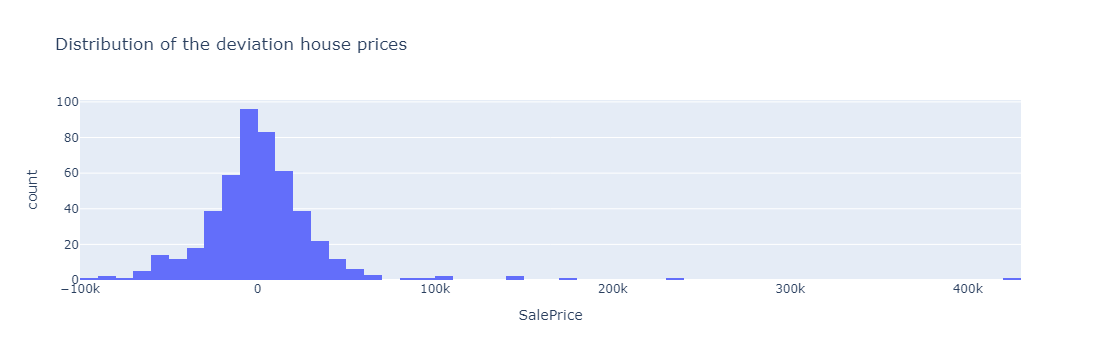

In [23]:
deviation_true = y_test-y_pred
#deviation_true

fig = px.histogram(deviation_true, x = "SalePrice", title = "Distribution of the deviation house prices")
fig.show()

Deviations centered in 0 (R^2 was a good value) => Not so many errors

Outlier above 400 000 € => We were wrong (underestimated) by 400 000€ on the final price

We have underestimations; not so many overestimations

=> Good for the house sellor

In [17]:
# The coefficients
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [ 2.07330653e+02 -9.19244630e+01  5.58214354e-01  7.52194416e+03
  3.07591572e+03  1.43962895e+02  1.73043925e+02  1.13324572e+01
  2.17865891e-01  8.13465583e+00 -5.27288432e-01  7.82526830e+00
 -1.52868348e+01  5.87486316e+00  5.11141769e+01  4.17021040e+01
  7.84144530e+03  1.82926610e+03  7.01407546e+03  1.86381879e+03
 -3.64091446e+03 -2.61879703e+04  4.81232987e+03  4.89946197e+03
 -1.23007875e+02  9.37733858e+03  1.29786854e+01  1.73894619e+01
 -1.05925431e+01  4.12307714e+01  6.58674713e+01  8.14539974e+01
  1.30131887e+03 -5.64119430e+00 -2.30038523e+02 -1.48024422e+02
  1.10732803e+04 -8.70633591e+03  1.53863761e+03  2.31165555e+03
 -6.21723760e+03  3.03370191e+04 -3.03370191e+04 -4.66865273e+03
  8.10128560e+03 -3.43263287e+03  7.39323114e+02  5.11132811e+03
  2.06056777e+03 -7.91121899e+03 -1.41173974e+04  1.63235146e+04
 -4.45327985e+03  2.24716275e+03  1.61007194e+04 -1.61007194e+04
  1.63899315e+03  9.23833673e+03 -7.47632799e+03 -4.38555865e+02
 -2.96244

In [18]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1323439777.98


In [21]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.82


In [24]:
deviation_true # pandas series containing the price deviations for each id of the houses

Id
893     -1252.454792
1106   -19411.108031
414      9251.327637
523    -24041.436495
1037   -37566.205149
            ...     
1011     3814.827223
391     14336.109641
1410     3922.802507
848    -11389.788940
1285   -10662.168799
Name: SalePrice, Length: 482, dtype: float64

In [25]:
deviation_true.reset_index()

,Id,SalePrice
0,893,-1252.454792
1,1106,-19411.108031
2,414,9251.327637
3,523,-24041.436495
4,1037,-37566.205149
...,...,...
477,1011,3814.827223
478,391,14336.109641
479,1410,3922.802507
480,848,-11389.788940


In [26]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscFeature_infrequent_sklearn,SaleType_COD,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
Id,,,,,,,,,,,,,,,,,,,,,
893,20,70.0,8414,6,8,1963,2003,0.0,663,0,...,0,0,0,1,0,0,0,1,0,0
1106,60,98.0,12256,8,5,1994,1995,362.0,1032,0,...,0,0,0,1,0,0,0,1,0,0
414,30,56.0,8960,5,6,1927,1950,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
523,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,0,0,1,0,0,0,1,0,0
1037,20,89.0,12898,9,5,2007,2008,70.0,1022,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,50,115.0,21286,5,5,1948,1950,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
391,50,50.0,8405,5,8,1900,1950,0.0,241,391,...,0,0,0,1,0,0,0,1,0,0
1410,60,46.0,20544,7,6,1986,1991,123.0,0,0,...,0,0,0,1,0,0,0,1,0,0
